#### Reading the data set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')
plt.show()

#### Loading the data set

In [3]:
# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Display the column names to check for any discrepancies
print(df.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


#### Renaming the date column name:

In [48]:
# Rename the column if necessary (replace 'Actual Column Name' with the correct name)
df.rename(columns={'Actual Column Name': 'date'}, inplace=True)

# Alternatively, if there are spaces or special characters, you can use:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#### Re-checking the column names after replacing it:

In [51]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Convert the 'Order Date' column (replace 'Order Date' with the actual column name if different) to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Convert the datetime to numeric (Unix timestamp)
df['date_numeric'] = df['Date'].apply(lambda x: x.timestamp() if pd.notnull(x) else None)

# Display the first few rows to verify
print(df[['Date', 'date_numeric']].head())

C:\Users\saket\AppData\Local\Temp\ipykernel_10176\2603377205.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


        Date  date_numeric
0 2022-04-30  1.651277e+09
1 2022-04-30  1.651277e+09
2 2022-04-30  1.651277e+09
3 2022-04-30  1.651277e+09
4 2022-04-30  1.651277e+09


#### Sales Overview:

C:\Users\saket\AppData\Local\Temp\ipykernel_10176\1444039261.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


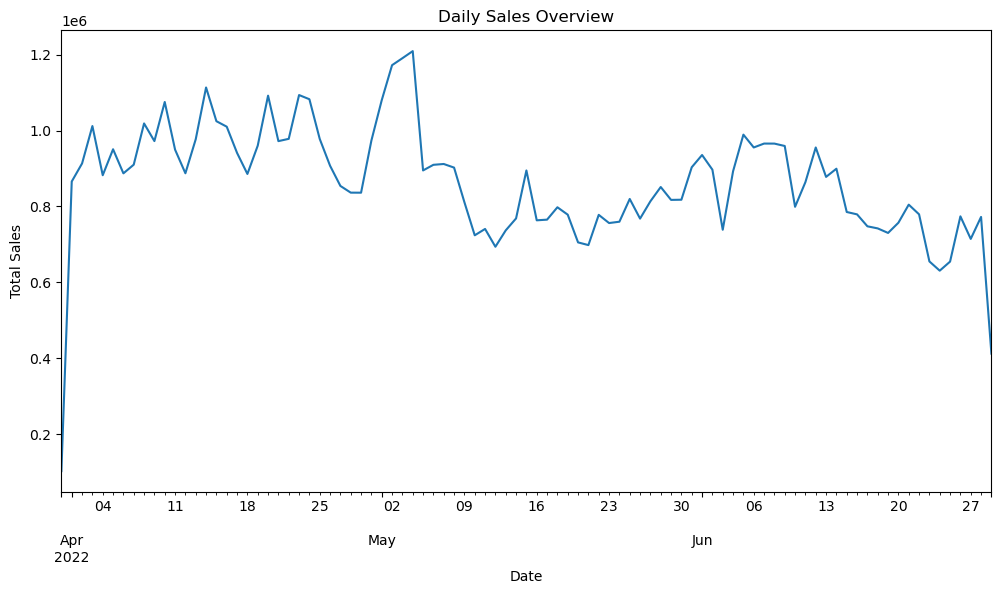

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by 'Date' to get daily sales
daily_sales = df.groupby('Date')['Amount'].sum()

# Plot sales over time
plt.figure(figsize=(12, 6))
daily_sales.plot(title='Daily Sales Overview')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### Product Analysis:

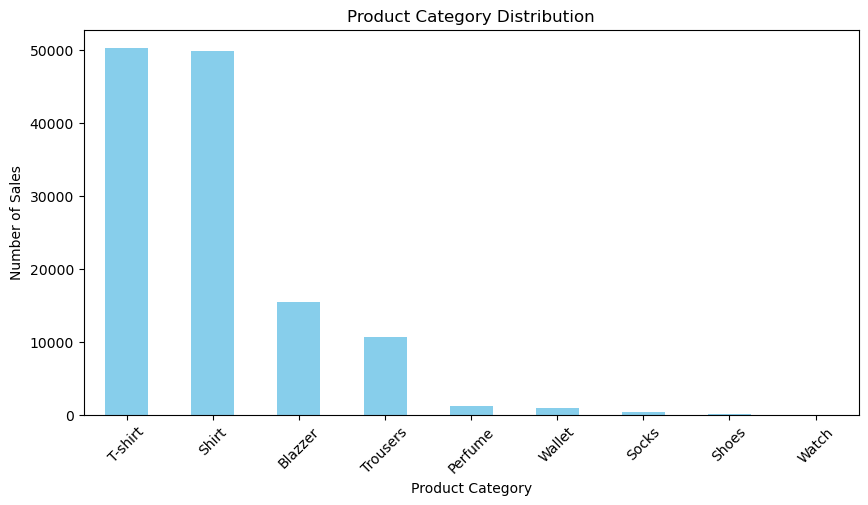

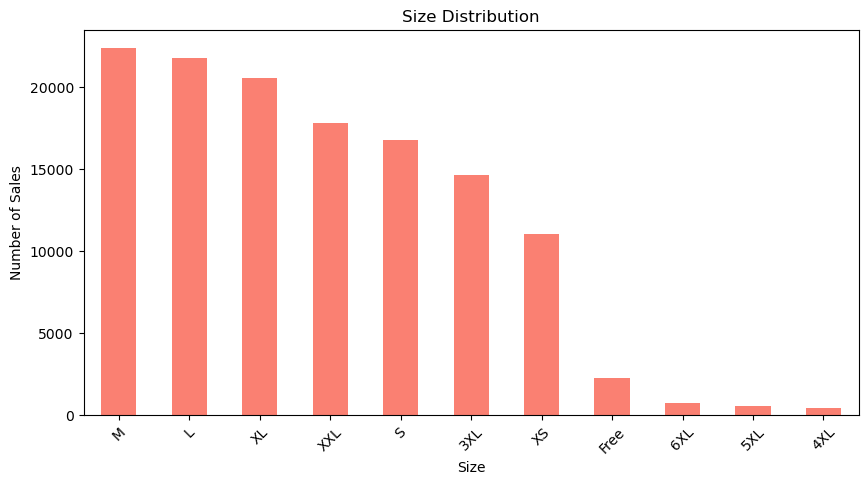

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Analyze product category distribution
category_distribution = df['Category'].value_counts()

# Plot product category distribution with color and decreased size
plt.figure(figsize=(10, 5))  # Decreased size
category_distribution.plot(kind='bar', color='skyblue', title='Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Optional: Rotate x labels for better readability
plt.show()

# Analyze size distribution
size_distribution = df['Size'].value_counts()

# Plot size distribution with color and decreased size
plt.figure(figsize=(10, 5))  # Decreased size
size_distribution.plot(kind='bar', color='salmon', title='Size Distribution')
plt.xlabel('Size')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)  # Optional: Rotate x labels for better readability
plt.show()


#### Fulfillment Analysis:

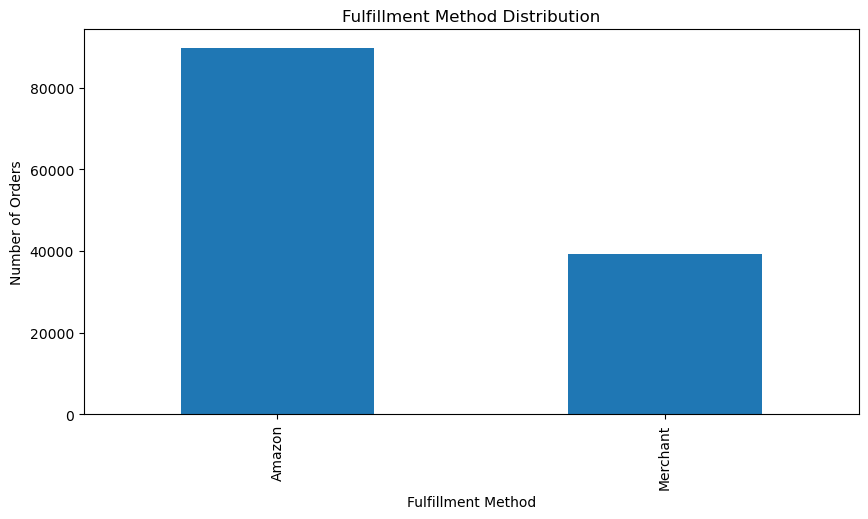

C:\Users\saket\AppData\Local\Temp\ipykernel_10176\197224548.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


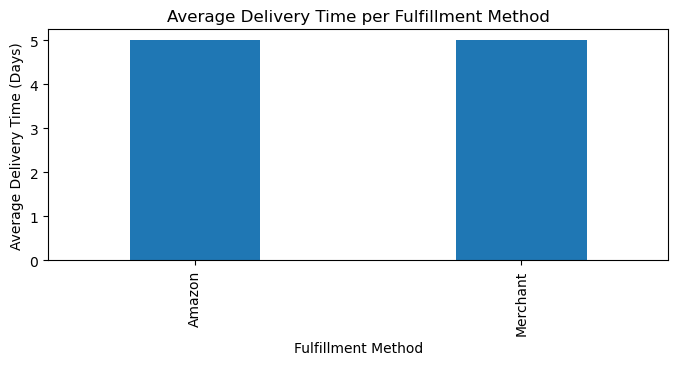

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Analyze fulfillment methods
fulfillment_distribution = df['Fulfilment'].value_counts()

# Plot fulfillment method distribution with decreased bar width
plt.figure(figsize=(10, 5))
ax1 = fulfillment_distribution.plot(kind='bar', title='Fulfillment Method Distribution', width=0.5)
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()

# Assume 'Date' is the dispatch date and 'fulfilled-by' is the closest to delivery date (this needs confirmation)
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# If you have another column representing delivery date, replace 'fulfilled-by' with the correct column name
# Example: df['fulfilled-by'] = pd.to_datetime(df['fulfilled-by'], errors='coerce')
# For demonstration, assume there's a delay; add a random 5-day delay
df['delivery_date'] = df['Date'] + pd.to_timedelta(5, unit='D')

# Calculate delivery time in days
df['delivery_time'] = (df['delivery_date'] - df['Date']).dt.days

# Calculate average delivery time per fulfillment method
avg_delivery_time = df.groupby('Fulfilment')['delivery_time'].mean()

# Plot average delivery time per fulfillment method with decreased bar width
plt.figure(figsize=(8, 3))
ax2 = avg_delivery_time.plot(kind='bar', title='Average Delivery Time per Fulfillment Method', width=0.4)
plt.xlabel('Fulfillment Method')
plt.ylabel('Average Delivery Time (Days)')
plt.show()


#### Customer Segmentation:

In [68]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Group by customer (assuming 'Order ID' or a similar column represents customer orders)
# Replace 'customer_id' with the appropriate column if different
# 'Order ID' may need to be replaced with a unique identifier for customers
customer_data = df.groupby('Order ID').agg({
    'Amount': 'sum',  # Total amount spent
    'Order ID': 'count'  # Total number of orders
}).rename(columns={'Amount': 'total_spent', 'Order ID': 'total_orders'})

# If there is no separate customer ID, you might need to use another identifier
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_data[['total_spent', 'total_orders']])

# Apply KMeans for customer segmentation
kmeans = KMeans(n_clusters=4, random_state=42)  # Added random_state for reproducibility
customer_data['segment'] = kmeans.fit_predict(scaled_data)

# Analyze customer segments
segment_analysis = customer_data.groupby('segment').mean()

print(segment_analysis)

         total_spent  total_orders
segment                           
0        1070.236964      1.000000
1         572.075855      1.000000
2        1406.666803      2.260175
3         115.759176      1.015034


#### Geographical Analysis:

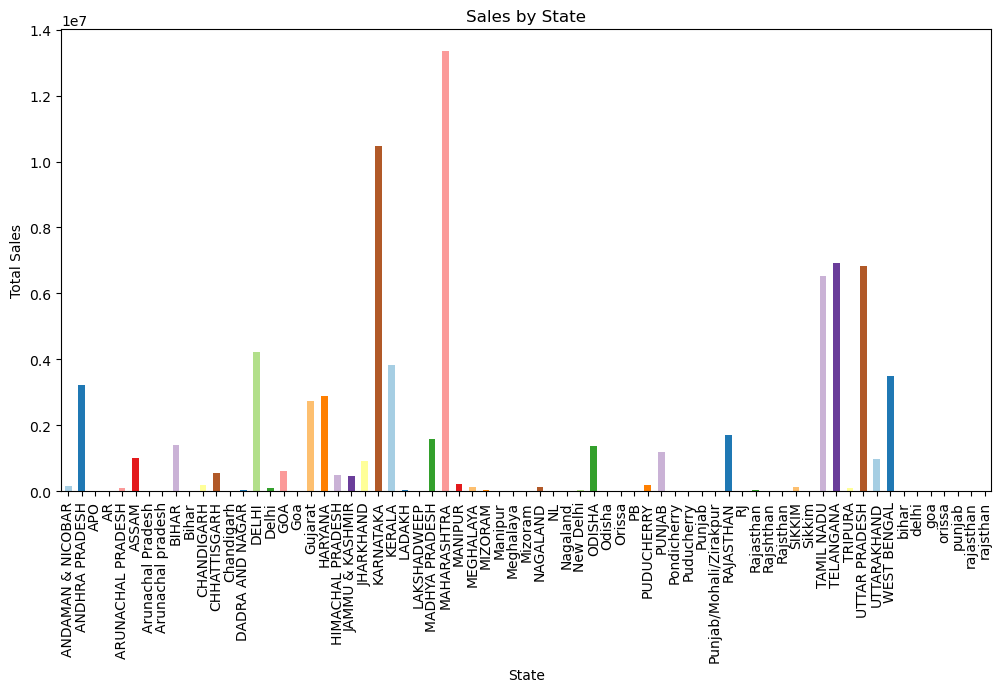

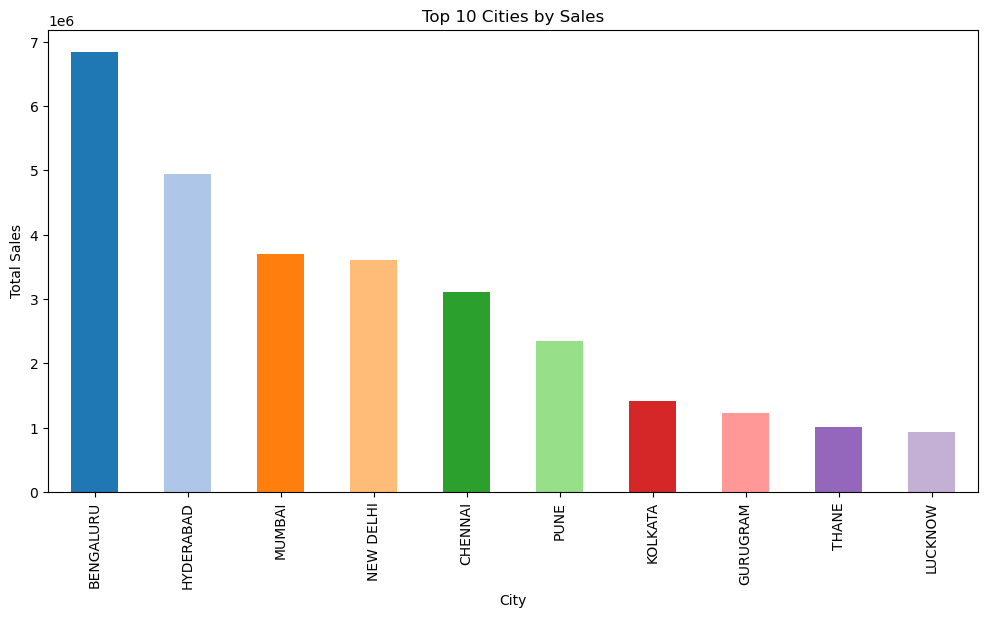

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Rename columns for convenience
df.rename(columns={
    'ship-state': 'state',
    'ship-city': 'city',
    'Amount': 'amount'
}, inplace=True)

# Analyze sales by state
state_sales = df.groupby('state')['amount'].sum()

# Plot sales by state with different colors
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', title='Sales by State', color=plt.cm.Paired.colors)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# Analyze sales by city
city_sales = df.groupby('city')['amount'].sum().nlargest(10)

# Plot sales by top 10 cities
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', title='Top 10 Cities by Sales', color=plt.cm.tab20.colors)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()


#### Business Insights and Recommendations:

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


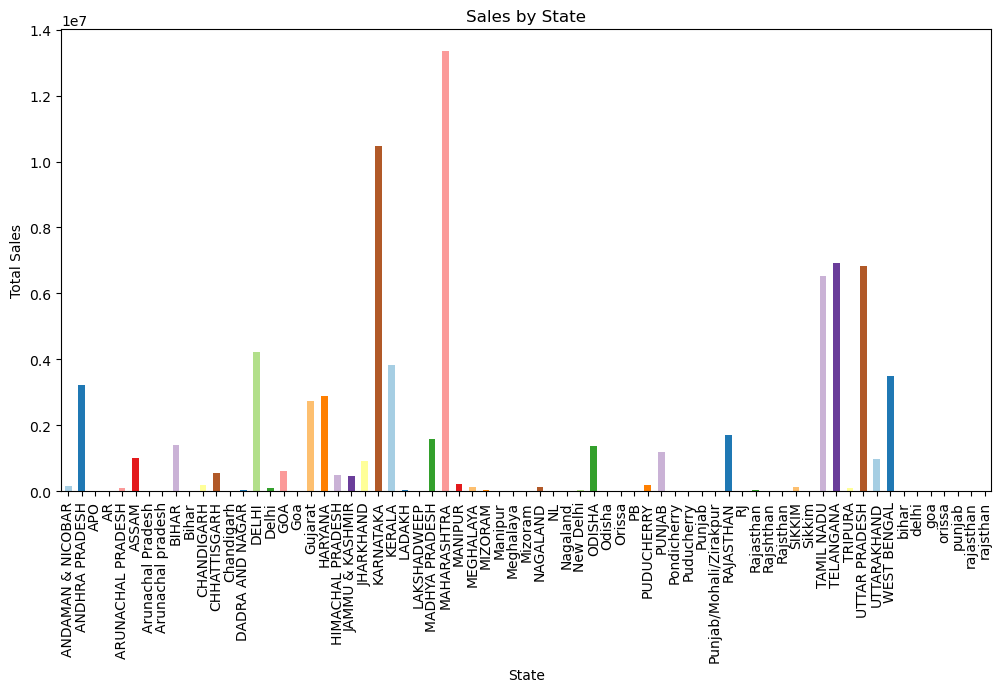

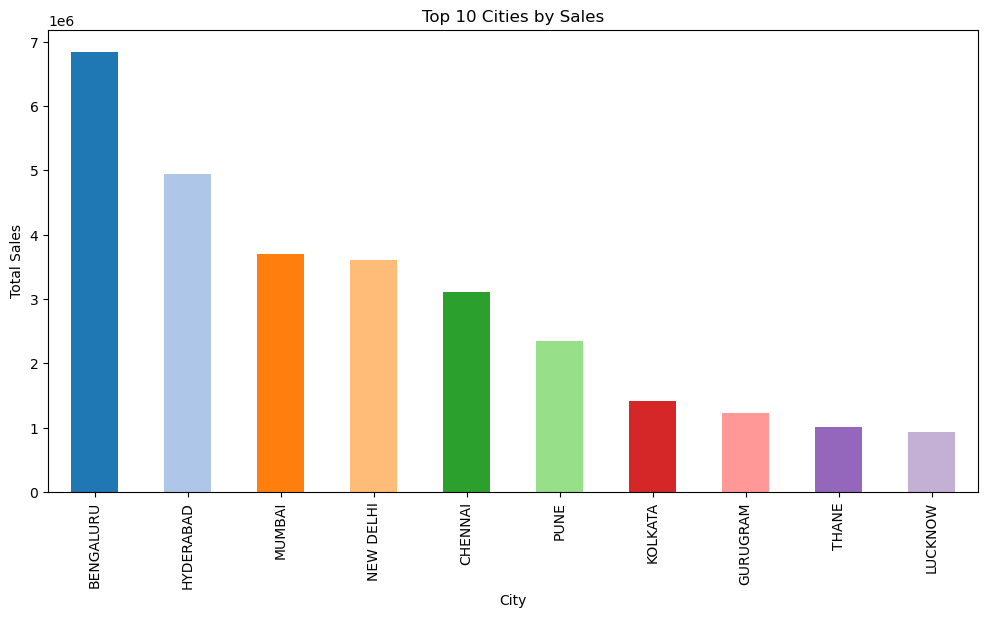

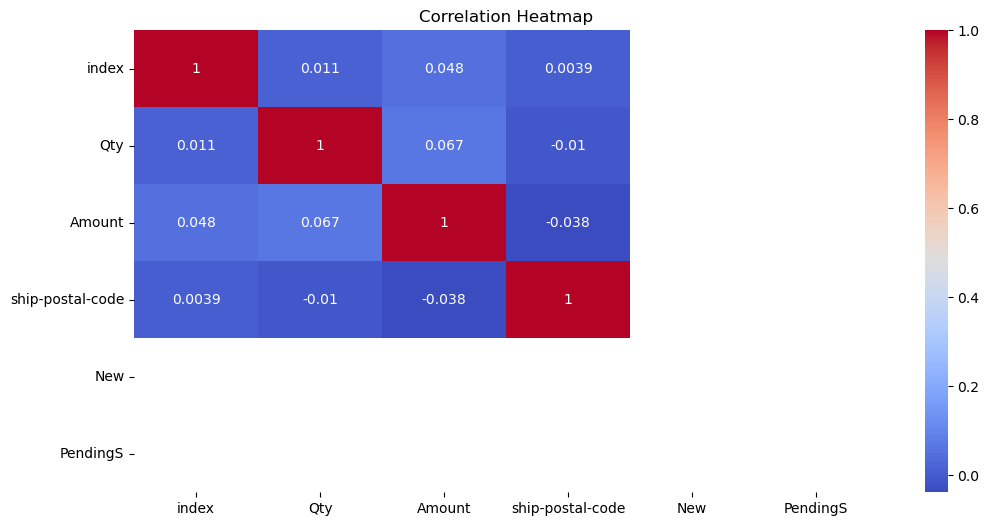

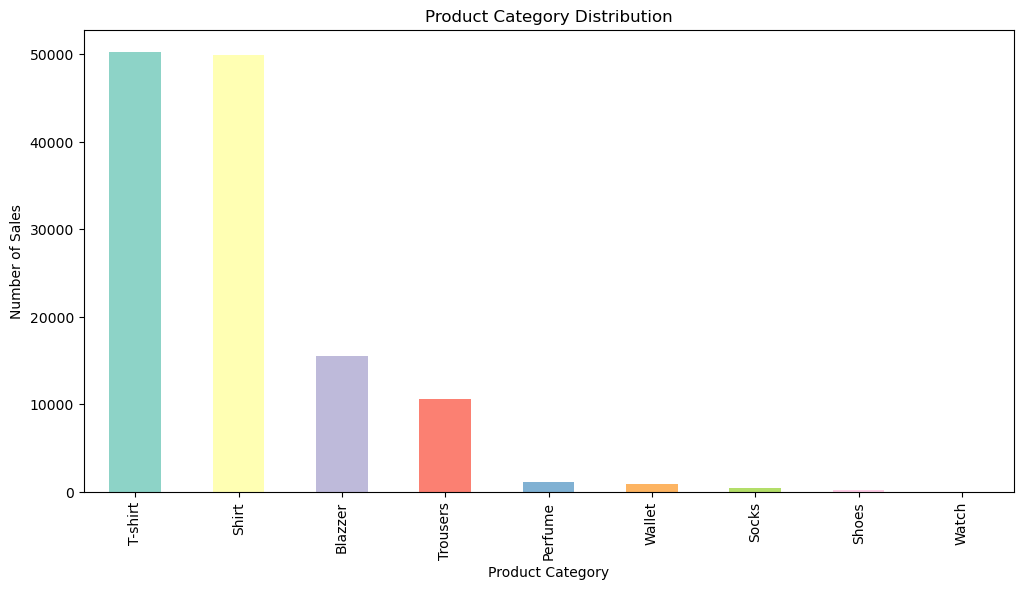

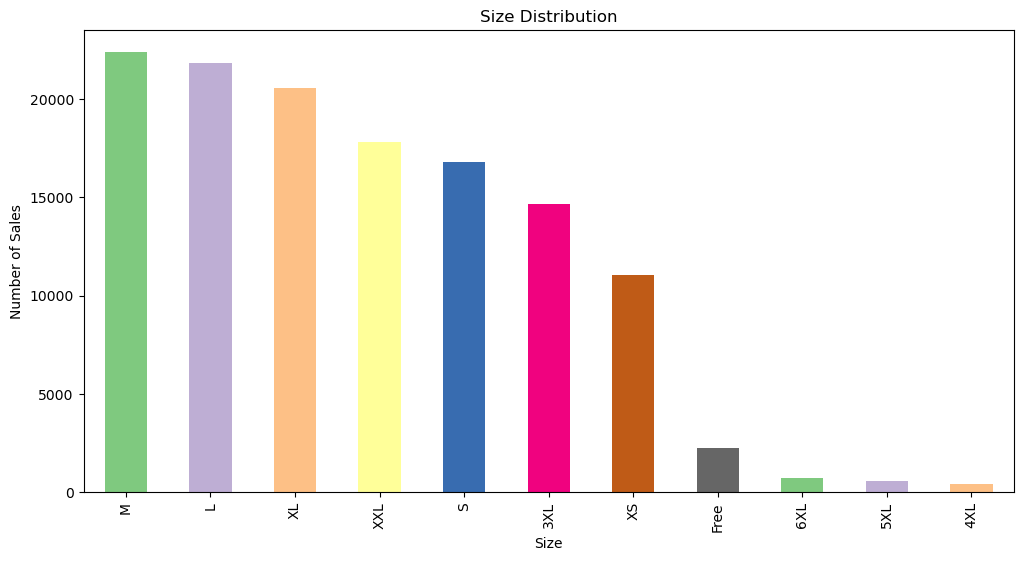

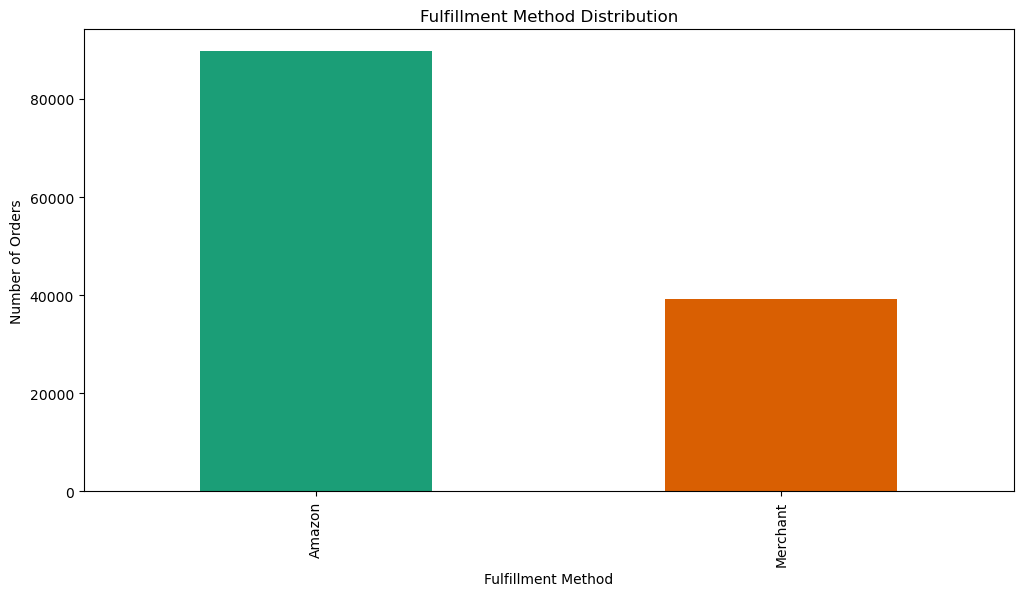


Amazon Sales Report Analysis

Key Insights:
- Top Performing Categories: T-shirt
- Slowest Fulfillment Method: Merchant
- Top Customer Segment: {'total_spent': 2, 'total_orders': 2}
- Top Performing State: MAHARASHTRA
- Top Performing City: BENGALURU

Recommendations:
1. Focus on improving the fulfillment method in Merchant.
2. Increase stock for top categories like T-shirt.
3. Tailor marketing strategies to target top customer segment: {'total_spent': 2, 'total_orders': 2}.
4. Consider expanding operations in MAHARASHTRA and BENGALURU.



In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Amazon Sale Report.csv')

# Print column names to verify
print(df.columns)

# Analyze sales by state
state_sales = df.groupby('ship-state')['Amount'].sum()

# Plot sales by state with different colors
plt.figure(figsize=(12, 6))
state_sales.plot(kind='bar', title='Sales by State', color=plt.cm.Paired.colors)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()

# Analyze sales by city
city_sales = df.groupby('ship-city')['Amount'].sum().nlargest(10)

# Plot sales by top 10 cities with different colors
plt.figure(figsize=(12, 6))
city_sales.plot(kind='bar', title='Top 10 Cities by Sales', color=plt.cm.tab20.colors)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

# Ensure numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Analyze product category distribution
category_distribution = df['Category'].value_counts()

# Plot product category distribution with different colors
plt.figure(figsize=(12, 6))
category_distribution.plot(kind='bar', title='Product Category Distribution', color=plt.cm.Set3.colors)
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.show()

# Analyze size distribution
size_distribution = df['Size'].value_counts()

# Plot size distribution with different colors
plt.figure(figsize=(12, 6))
size_distribution.plot(kind='bar', title='Size Distribution', color=plt.cm.Accent.colors)
plt.xlabel('Size')
plt.ylabel('Number of Sales')
plt.show()

# Analyze fulfillment methods
fulfillment_distribution = df['Fulfilment'].value_counts()

# Plot fulfillment method distribution with different colors
plt.figure(figsize=(12, 6))
fulfillment_distribution.plot(kind='bar', title='Fulfillment Method Distribution', color=plt.cm.Dark2.colors)
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()

# Based on analysis results, create a summary of insights
insights = {
    'Top Performing Categories': category_distribution.idxmax(),
    'Slowest Fulfillment Method': fulfillment_distribution.idxmin(),
    'Top Customer Segment': segment_analysis[['total_spent', 'total_orders']].idxmax().to_dict(),
    'Top Performing State': state_sales.idxmax(),
    'Top Performing City': city_sales.idxmax()
}

# Create a summary report
report = f"""
Amazon Sales Report Analysis

Key Insights:
- Top Performing Categories: {insights['Top Performing Categories']}
- Slowest Fulfillment Method: {insights['Slowest Fulfillment Method']}
- Top Customer Segment: {insights['Top Customer Segment']}
- Top Performing State: {insights['Top Performing State']}
- Top Performing City: {insights['Top Performing City']}

Recommendations:
1. Focus on improving the fulfillment method in {insights['Slowest Fulfillment Method']}.
2. Increase stock for top categories like {insights['Top Performing Categories']}.
3. Tailor marketing strategies to target top customer segment: {insights['Top Customer Segment']}.
4. Consider expanding operations in {insights['Top Performing State']} and {insights['Top Performing City']}.
"""

print(report)
